In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)
plt.rc('axes', labelsize=15)

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
x_train = iris.petal_length.values
y_train = iris.petal_width.values

Try to implement a [linear regression model with gradient descent](https://www.tensorflow.org/versions/r1.1/get_started/get_started) to model the relationship between petal length and width.

$$Y = Wx + b$$

Let's look at the "true" answer with ```LinearRegression``` from **scikit-learn**:

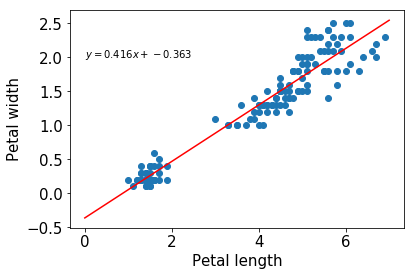

In [5]:
from sklearn.linear_model import LinearRegression

def plot_weight(w, b, ax):
    ax.scatter(iris.petal_length, iris.petal_width)
    x = np.arange(0,8)
    ax.plot(x, w * x + b, color = 'red')
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.text(0,2, '$y = %.3fx + %.3f$' %(np.round(w,3), np.round(b,3)))


fig = plt.figure()
ax = fig.add_subplot(111)
sk_lm = LinearRegression()
sk_lm.fit(x_train.reshape(-1, 1), y_train)
plot_weight(sk_lm.coef_, sk_lm.intercept_, ax)

As expected, linear regression in **scikit-learn** does what it does.    

Now, lets implement a linear regression with **TensorFlow**. **TensorFlow** is a computational graph library, it only computes every thing when an ```session``` is initiated and run.

In [6]:
import tensorflow as tf


def tensor_lm(x,y, learning_rate, plot_loss):
    W = tf.Variable([1.], tf.float32)  # initialize 
    b = tf.Variable([1.], tf.float32)

    X = tf.placeholder(tf.float32)#, iris.petal_length)
    Y = tf.placeholder(tf.float32)#iris.petal_width)
    lm = W * X + b

    sqrd_loss = tf.square(Y - lm)
    loss = tf.reduce_sum(sqrd_loss)

    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train = optimizer.minimize(loss)
    
    init_op = tf.global_variables_initializer()

    losses = []
    W = []
    b = []
    with tf.Session() as sess:
        sess.run(init_op)

        for i in range(1000):
            curr_W, curr_b, curr_loss, l, _ = sess.run([W, b, loss train], {X:x_train, Y:y_train})
            losses.append(l)
            W.append(curr_W)
            b.append(curr_b)
    
    for ax in plot_loss:
        ax.plot(losses, label = r'$10^{%i}$' %np.log10(learning_rate))
    return W, b

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
axins = fig.add_axes([0.6,0.4,0.4,0.3])
for lr in np.arange(1,5):
    W, b = tensor_lm(x_train, y_train, 0.1**(lr), plot_loss=[ax, axins])
ax.set_ylabel('Loss (sum of square error)')
ax.set_xlabel('Iteration')
ax.legend(title = 'Learning rate',
          bbox_to_anchor = (0.2,0.9))

axins.set_ylim(0,100)
axins.set_xlim(0,500)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
sns.despine()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot_weight(W[-1], b[-1], ax)

In [ ]:
ax = plt.subplot(111)
for i in np.linspace(0,10000,20):
    i = int(i)    
    plot_weight(W[i], b[i], ax)

In [ ]:
W[i]